# Step 3: Correlate RDM Matrices

This notebook correlates two RDM matrices (e.g., BV_CLIP vs THINGS_CLIP) using Spearman correlation.

## Overview

This step:
1. Loads two RDM distance matrices (e.g., BV_CLIP and THINGS_CLIP)
2. Matches categories between matrices if needed
3. Extracts lower triangle (excluding diagonal)
4. Computes Pearson and Spearman correlations
5. Reports correlation statistics

## Prerequisites

This step requires:
- Output normalized and filtered RDMs from Step 2

## Setup and Imports

In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import spearmanr, pearsonr, kendalltau
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("All imports successful!")

All imports successful!


## Configuration

**Please update the paths below according to your setup:**

In [ ]:
# ============================================================================
# CONFIGURATION - UPDATE THESE PATHS FOR YOUR SETUP
# ============================================================================

# Input RDM matrices
INPUT_RDM1_PATH = "./bv_dino_filtered_zscored_hierarchical_163cats/distance_matrix_filtered_original.npy"  # First RDM matrix path
INPUT_RDM2_PATH = "./things_dino_filtered_zscored_hierarchical_163cats/distance_matrix_filtered_original.npy"  # Second RDM matrix path

# Output directory for correlation results
OUTPUT_DIR = "./correlation_results_12102025"  # Directory to save correlation results
OUTPUT_FILENAME = 'bv_things_dino_rdm_correlation_results_163cats_26filtered.txt'  # Output filename

print("Configuration loaded. Please review and update paths as needed.")

Configuration loaded. Please review and update paths as needed.


## Correlate RDM Matrices

In [23]:
print("="*60)
print("CORRELATING RDM MATRICES")
print("="*60)

# Convert paths to Path objects
rdm1_path = Path(INPUT_RDM1_PATH)
rdm2_path = Path(INPUT_RDM2_PATH)

# Check if files exist
if not rdm1_path.exists():
    raise FileNotFoundError(f"Error: {rdm1_path} not found. Please check INPUT_RDM1_PATH.")
if not rdm2_path.exists():
    raise FileNotFoundError(f"Error: {rdm2_path} not found. Please check INPUT_RDM2_PATH.")

# Load matrices
print(f"Loading RDM 1 from {rdm1_path}...")
matrix1 = np.load(rdm1_path)
print(f"  Shape: {matrix1.shape}")

print(f"Loading RDM 2 from {rdm2_path}...")
matrix2 = np.load(rdm2_path)
print(f"  Shape: {matrix2.shape}")

# Check if shapes match
if matrix1.shape != matrix2.shape:
    raise ValueError(f"Matrices have different shapes: {matrix1.shape} vs {matrix2.shape}. "
                     f"Please ensure both matrices have the same dimensions.")

# Extract lower triangle (excluding diagonal)
# k=-1 excludes the diagonal (k=0 would include it)
vec1 = matrix1[np.tril_indices_from(matrix1, k=-1)]
vec2 = matrix2[np.tril_indices_from(matrix2, k=-1)]

print(f"\nExtracted lower triangle (excluding diagonal): {len(vec1)} elements")

# Remove NaN/Inf values
mask = np.isfinite(vec1) & np.isfinite(vec2)
vec1_clean = vec1[mask]
vec2_clean = vec2[mask]

print(f"Valid elements: {len(vec1_clean)} / {len(vec1)}")

# Compute correlations
spearman_r, spearman_p = spearmanr(vec1_clean, vec2_clean)
pearson_r, pearson_p = pearsonr(vec1_clean, vec2_clean)
kendall_r, kendall_p = kendalltau(vec1_clean, vec2_clean)

# Print results
print("\n" + "="*60)
print("CORRELATION RESULTS")
print("="*60)
print(f"Spearman r: {spearman_r:.6f} (p = {spearman_p:.2e})")
print(f"Pearson r:  {pearson_r:.6f} (p = {pearson_p:.2e})")
print(f"Kendall τ: {kendall_r:.6f} (p = {kendall_p:.2e})")
print(f"\nMatrix 1 stats: Mean={vec1_clean.mean():.6f}, Std={vec1_clean.std():.6f}")
print(f"Matrix 2 stats: Mean={vec2_clean.mean():.6f}, Std={vec2_clean.std():.6f}")

# Save results to output directory
output_dir = Path(OUTPUT_DIR)
output_dir.mkdir(parents=True, exist_ok=True)

# Create results text file
results_file = output_dir / OUTPUT_FILENAME
with open(results_file, 'w') as f:
    f.write("="*60 + "\n")
    f.write("RDM MATRIX CORRELATION RESULTS\n")
    f.write("="*60 + "\n\n")
    f.write(f"RDM 1: {rdm1_path}\n")
    f.write(f"RDM 2: {rdm2_path}\n\n")
    f.write(f"Matrix 1 shape: {matrix1.shape}\n")
    f.write(f"Matrix 2 shape: {matrix2.shape}\n\n")
    f.write(f"Extracted lower triangle (excluding diagonal): {len(vec1)} elements\n")
    f.write(f"Valid elements: {len(vec1_clean)} / {len(vec1)}\n\n")
    f.write("="*60 + "\n")
    f.write("CORRELATION RESULTS\n")
    f.write("="*60 + "\n")
    f.write(f"Spearman r: {spearman_r:.6f}\n")
    f.write(f"Spearman p-value: {spearman_p:.2e}\n")
    f.write(f"Pearson r: {pearson_r:.6f}\n")
    f.write(f"Pearson p-value: {pearson_p:.2e}\n")
    f.write(f"Kendall τ: {kendall_r:.6f}\n")
    f.write(f"Kendall p-value: {kendall_p:.2e}\n\n")
    f.write("Matrix Statistics:\n")
    f.write(f"  Matrix 1: Mean={vec1_clean.mean():.6f}, Std={vec1_clean.std():.6f}\n")
    f.write(f"  Matrix 2: Mean={vec2_clean.mean():.6f}, Std={vec2_clean.std():.6f}\n")

print(f"\nResults saved to: {results_file}")

CORRELATING RDM MATRICES
Loading RDM 1 from bv_clip_filtered_zscored_hierarchical_163cats/distance_matrix_filtered_original.npy...
  Shape: (163, 163)
Loading RDM 2 from things_clip_filtered_zscored_hierarchical_163cats/distance_matrix_filtered_original.npy...
  Shape: (163, 163)

Extracted lower triangle (excluding diagonal): 13203 elements
Valid elements: 13203 / 13203

CORRELATION RESULTS
Spearman r: 0.371377 (p = 0.00e+00)
Pearson r:  0.467521 (p = 0.00e+00)
Kendall τ: 0.256535 (p = 0.00e+00)

Matrix 1 stats: Mean=1.003400, Std=0.269071
Matrix 2 stats: Mean=1.005676, Std=0.125451

Results saved to: correlation_results_12102025/bv_things_clip_rdm_correlation_results_163cats_26filtered.txt


## Diagnostic Checks

This section performs diagnostic checks to investigate the correlation results.

In [24]:
print("="*60)
print("DIAGNOSTIC CHECKS")
print("="*60)

# Load matrices again for diagnostics
rdm1_path = Path(INPUT_RDM1_PATH)
rdm2_path = Path(INPUT_RDM2_PATH)
matrix1 = np.load(rdm1_path)
matrix2 = np.load(rdm2_path)

# Check 1: Matrix symmetry
print("\n1. Checking matrix symmetry...")
is_symmetric1 = np.allclose(matrix1, matrix1.T)
is_symmetric2 = np.allclose(matrix2, matrix2.T)
print(f"   Matrix 1 is symmetric: {is_symmetric1}")
print(f"   Matrix 2 is symmetric: {is_symmetric2}")

# Check 2: Diagonal values
print("\n2. Checking diagonal values...")
diag1 = np.diag(matrix1)
diag2 = np.diag(matrix2)
print(f"   Matrix 1 diagonal - Min: {diag1.min():.6f}, Max: {diag1.max():.6f}, Mean: {diag1.mean():.6f}")
print(f"   Matrix 2 diagonal - Min: {diag2.min():.6f}, Max: {diag2.max():.6f}, Mean: {diag2.mean():.6f}")
print(f"   Expected: Should be ~0 for distance matrices (self-distance)")

# Check 3: Value ranges
print("\n3. Checking value ranges...")
print(f"   Matrix 1 - Min: {matrix1.min():.6f}, Max: {matrix1.max():.6f}")
print(f"   Matrix 2 - Min: {matrix2.min():.6f}, Max: {matrix2.max():.6f}")

# Check 4: Sample some values
print("\n4. Sample values (first 5x5 block):")
print("   Matrix 1:")
print(matrix1[:5, :5])
print("   Matrix 2:")
print(matrix2[:5, :5])

# Check 5: Check if categories are in same order
print("\n5. Checking category alignment...")
# Try to find category name files
rdm1_dir = rdm1_path.parent
rdm2_dir = rdm2_path.parent

cat_file1 = rdm1_dir / "category_names.txt"
cat_file2 = rdm2_dir / "category_names.txt"

if cat_file1.exists() and cat_file2.exists():
    with open(cat_file1, 'r') as f:
        cats1 = [line.strip() for line in f.readlines()]
    with open(cat_file2, 'r') as f:
        cats2 = [line.strip() for line in f.readlines()]
    
    print(f"   Found category files: {len(cats1)} and {len(cats2)} categories")
    if cats1 == cats2:
        print("   ✓ Categories are in the same order")
    else:
        print("   ⚠ Categories are NOT in the same order!")
        print(f"   First 5 categories in Matrix 1: {cats1[:5]}")
        print(f"   First 5 categories in Matrix 2: {cats2[:5]}")
        # Check how many match
        matches = sum(c1 == c2 for c1, c2 in zip(cats1, cats2))
        print(f"   Categories in same position: {matches}/{len(cats1)}")
else:
    print("   Category name files not found - cannot verify category alignment")

# Check 6: Correlation with different extraction methods
print("\n6. Testing different correlation methods...")
vec1 = matrix1[np.tril_indices_from(matrix1, k=-1)]
vec2 = matrix2[np.tril_indices_from(matrix2, k=-1)]
mask = np.isfinite(vec1) & np.isfinite(vec2)
vec1_clean = vec1[mask]
vec2_clean = vec2[mask]

# Pearson correlation
from scipy.stats import pearsonr
pearson_r, pearson_p = pearsonr(vec1_clean, vec2_clean)
spearman_r, spearman_p = spearmanr(vec1_clean, vec2_clean)

print(f"   Pearson r:  {pearson_r:.6f} (p = {pearson_p:.2e})")
print(f"   Spearman r: {spearman_r:.6f} (p = {spearman_p:.2e})")

# Check 7: Distribution comparison
print("\n7. Distribution statistics:")
print(f"   Matrix 1 - Mean: {vec1_clean.mean():.6f}, Median: {np.median(vec1_clean):.6f}, Std: {vec1_clean.std():.6f}")
print(f"   Matrix 2 - Mean: {vec2_clean.mean():.6f}, Median: {np.median(vec2_clean):.6f}, Std: {vec2_clean.std():.6f}")

# Check 8: Check for potential issues
print("\n8. Potential issues:")
if not is_symmetric1 or not is_symmetric2:
    print("   ⚠ WARNING: One or both matrices are not symmetric!")
if abs(diag1.mean()) > 0.01 or abs(diag2.mean()) > 0.01:
    print("   ⚠ WARNING: Diagonal values are not close to zero (expected for distance matrices)")
if vec1_clean.std() < 0.01 or vec2_clean.std() < 0.01:
    print("   ⚠ WARNING: Very low standard deviation - matrices may have little variation")
if abs(spearman_r) < 0.1 and abs(pearson_r) < 0.1:
    print("   ⚠ WARNING: Both correlations are very low - matrices may not be aligned or comparable")

print("\n" + "="*60)

DIAGNOSTIC CHECKS

1. Checking matrix symmetry...
   Matrix 1 is symmetric: True
   Matrix 2 is symmetric: True

2. Checking diagonal values...
   Matrix 1 diagonal - Min: 0.000000, Max: 0.000000, Mean: 0.000000
   Matrix 2 diagonal - Min: 0.000000, Max: 0.000000, Mean: 0.000000
   Expected: Should be ~0 for distance matrices (self-distance)

3. Checking value ranges...
   Matrix 1 - Min: 0.000000, Max: 1.625755
   Matrix 2 - Min: 0.000000, Max: 1.319146

4. Sample values (first 5x5 block):
   Matrix 1:
[[0.         1.36549846 1.46640922 0.89172596 0.6585477 ]
 [1.36549846 0.         0.69640437 1.11848908 0.95469426]
 [1.46640922 0.69640437 0.         1.00201647 1.41590844]
 [0.89172596 1.11848908 1.00201647 0.         0.78020947]
 [0.6585477  0.95469426 1.41590844 0.78020947 0.        ]]
   Matrix 2:
[[0.         1.023463   1.0786594  1.1649965  1.027607  ]
 [1.023463   0.         1.0277576  1.0571223  0.62848645]
 [1.0786594  1.0277576  0.         0.6399016  0.97985077]
 [1.1649965  

Sampling 10000 points for visualization (out of 13203 total)


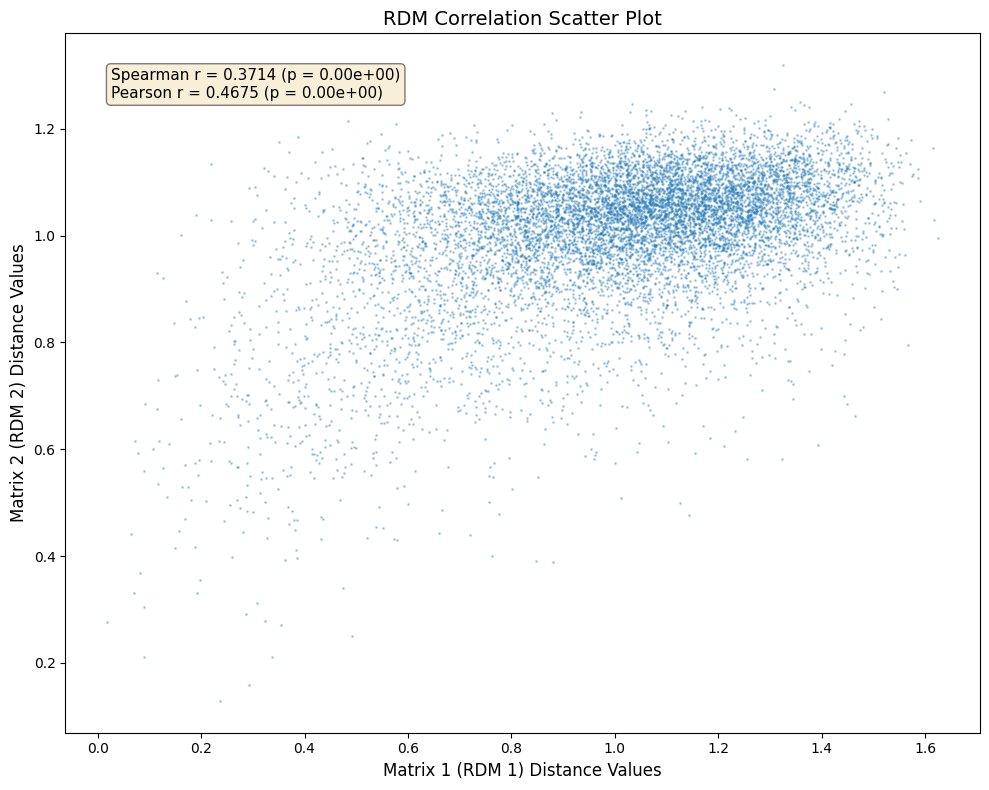


Scatter plot saved to: correlation_results_12102025/correlation_scatter_plot.png


<Figure size 640x480 with 0 Axes>

In [25]:
# Visualize the relationship
import matplotlib.pyplot as plt

# Load matrices
rdm1_path = Path(INPUT_RDM1_PATH)
rdm2_path = Path(INPUT_RDM2_PATH)
matrix1 = np.load(rdm1_path)
matrix2 = np.load(rdm2_path)

# Extract lower triangle
vec1 = matrix1[np.tril_indices_from(matrix1, k=-1)]
vec2 = matrix2[np.tril_indices_from(matrix2, k=-1)]
mask = np.isfinite(vec1) & np.isfinite(vec2)
vec1_clean = vec1[mask]
vec2_clean = vec2[mask]

# Sample for visualization (if too many points)
if len(vec1_clean) > 10000:
    sample_idx = np.random.choice(len(vec1_clean), size=10000, replace=False)
    vec1_plot = vec1_clean[sample_idx]
    vec2_plot = vec2_clean[sample_idx]
    print(f"Sampling {len(sample_idx)} points for visualization (out of {len(vec1_clean)} total)")
else:
    vec1_plot = vec1_clean
    vec2_plot = vec2_clean

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(vec1_plot, vec2_plot, alpha=0.3, s=1)
ax.set_xlabel('Matrix 1 (RDM 1) Distance Values', fontsize=12)
ax.set_ylabel('Matrix 2 (RDM 2) Distance Values', fontsize=12)
ax.set_title('RDM Correlation Scatter Plot', fontsize=14)

# Add correlation text
spearman_r, spearman_p = spearmanr(vec1_clean, vec2_clean)
from scipy.stats import pearsonr
pearson_r, pearson_p = pearsonr(vec1_clean, vec2_clean)

textstr = f'Spearman r = {spearman_r:.4f} (p = {spearman_p:.2e})\nPearson r = {pearson_r:.4f} (p = {pearson_p:.2e})'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Save plot
output_dir = Path(OUTPUT_DIR)
output_dir.mkdir(parents=True, exist_ok=True)
plot_file = output_dir / "correlation_scatter_plot.png"
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
print(f"\nScatter plot saved to: {plot_file}")